In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [49]:
# === Load Data ===
df = pd.read_csv(r'D:\Coding\Major-Project\new_\data\preprocessed_data.csv')

df.head()

,I,P,Q,T,Hydrogen,Oxygen,RH anode,Rh Cathode,V
0,-0.886787,-1.027522,-0.806638,-1.261444,-1.873236,-1.227992,-2.493136,-1.875273,491.114619
1,-0.886787,-1.027522,-0.806638,-1.261444,-1.872990,-1.227992,-2.493136,-1.875273,491.114619
2,-0.886787,-1.027522,-0.806638,-1.261444,-1.872671,-1.227991,-2.493136,-1.875273,491.114619
3,-0.886787,-1.027522,-0.806638,-1.261444,-1.870597,-1.227988,-2.493136,-1.875273,491.114619
4,-0.886787,-1.027522,-0.806638,-1.261444,-1.867493,-1.227981,-2.493136,-1.875273,491.114619


In [50]:
X = df[['I', 'T', 'Hydrogen', 'Oxygen']]  # I = current, T = temperature
y = df['V']  # Voltage

In [51]:
# === Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# === SVR Pipeline ===
model = make_pipeline(
    StandardScaler(),
    SVR(kernel="rbf", degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1, epsilon=0.1, shrinking=True, cache_size=200.0, verbose=False)
)

In [53]:
# === Train ===
model.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('svr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0


In [54]:
# === Predictions ===
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [55]:
# === Evaluation ===
rmse_train = mean_squared_error(y_train, y_train_pred) ** 0.5
rmse_test = mean_squared_error(y_test, y_test_pred) ** 0.5
print(f"Train R²: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test R²:  {r2_score(y_test, y_test_pred):.4f}")
print(f"Train MAE: {mean_absolute_error(y_train, y_train_pred):.4f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_test_pred):.4f}")
print(f"Train RMSE: {rmse_train:.4f}")
print(f"Test RMSE:  {rmse_test:.4f}")

Train R²: 0.9349
Test R²:  0.9148
Train MAE: 10.4523
Test MAE: 11.2093
Train RMSE: 16.0204
Test RMSE:  17.3732


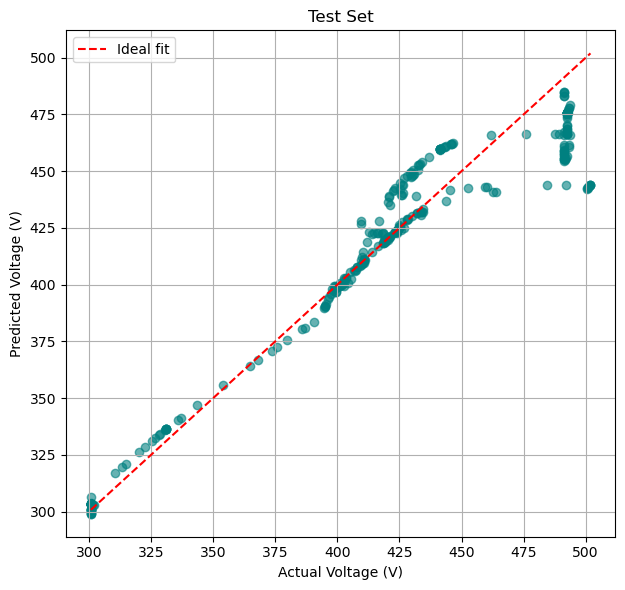

In [61]:
# === Plot: Actual vs Predicted (Train & Test) ===
plt.figure(figsize=(12, 6))

# Train set
# plt.subplot(1, 2, 1)
# plt.scatter(y_train, y_train_pred, alpha=0.6, color='green')
# plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal fit')
# plt.title("Training Set")
# plt.xlabel("Actual Voltage (V)")
# plt.ylabel("Predicted Voltage (V)")
# plt.grid(True)
# plt.legend()

# Test set
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred, alpha=0.6, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal fit')
plt.title("Test Set")
plt.xlabel("Actual Voltage (V)")
plt.ylabel("Predicted Voltage (V)")
plt.grid(True)
plt.legend()

# plt.suptitle("SVR: Actual vs Predicted Voltage")
plt.tight_layout()
plt.show()